# 대구 v.s 전국 교통사고 현황

### 데이터 로드

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': # 맥OS
     rc('font', family='AppleGothic')
     
elif platform.system() == 'Windows': # 윈도우

     path = "c:/Windows/Fonts/malgun.ttf"
     font_name = font_manager.FontProperties(fname=path).get_name()
     rc('font', family=font_name)
else:
     print('Unknown system... sorry~~~')

In [3]:
import pandas as pd

# 전국데이터
df_org = pd.read_csv('./open/open/external_open/countrywide_accident.csv')
# train 데이터
train_org = pd.read_csv('./data/train.csv')

display(df_org.head())
display(train_org.head())


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,COUNTRYWIDE_ACCIDENT_000000,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,40세,경상,0,0,1,0,3
1,COUNTRYWIDE_ACCIDENT_000001,2019-01-01 00,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
2,COUNTRYWIDE_ACCIDENT_000002,2019-01-01 00,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,17세,중상,0,1,0,0,5
3,COUNTRYWIDE_ACCIDENT_000003,2019-01-01 00,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,10세,중상,0,2,0,0,10
4,COUNTRYWIDE_ACCIDENT_000004,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,56세,경상,0,0,2,1,7


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


### 데이터 확인

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602775 entries, 0 to 602774
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           602775 non-null  object
 1   사고일시         602775 non-null  object
 2   요일           602775 non-null  object
 3   기상상태         602775 non-null  object
 4   시군구          602775 non-null  object
 5   도로형태         602775 non-null  object
 6   노면상태         602774 non-null  object
 7   사고유형         602775 non-null  object
 8   사고유형 - 세부분류  602775 non-null  object
 9   법규위반         602775 non-null  object
 10  가해운전자 차종     602775 non-null  object
 11  가해운전자 성별     602775 non-null  object
 12  가해운전자 연령     602775 non-null  object
 13  가해운전자 상해정도   602775 non-null  object
 14  피해운전자 차종     576948 non-null  object
 15  피해운전자 성별     576946 non-null  object
 16  피해운전자 연령     576949 non-null  object
 17  피해운전자 상해정도   576946 non-null  object
 18  사망자수         602775 non-null  int64 
 19  중상

In [5]:
print(df_org.isnull().sum())
print(train_org.isnull().sum())

ID                 0
사고일시               0
요일                 0
기상상태               0
시군구                0
도로형태               0
노면상태               1
사고유형               0
사고유형 - 세부분류        0
법규위반               0
가해운전자 차종           0
가해운전자 성별           0
가해운전자 연령           0
가해운전자 상해정도         0
피해운전자 차종       25827
피해운전자 성별       25829
피해운전자 연령       25826
피해운전자 상해정도     25829
사망자수               0
중상자수               0
경상자수               0
부상자수               0
ECLO               0
dtype: int64
ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64


- 피해 운전자 차종, 성별, 연령, 상해정도에서 다수의 null값 확인
- 정확한 분석을 위해 제외하고 분석 예정
- 전국 교통사고 데이터의 노면상태 컬럼에서 1개의 null값이 존재하나 분석 시 문제 없을거라 판단해서 그대로 진행

In [6]:
print(df_org['요일'].unique())
print(train_org['요일'].unique())

['화요일' '수요일' '목요일' '금요일' '토요일' '일요일' '월요일']
['화요일' '수요일' '목요일' '금요일' '토요일' '일요일' '월요일']


In [27]:
print(df_org['기상상태'].unique())
print(train_org['기상상태'].unique())

['맑음' '흐림' '눈' '기타' '비' '안개']
['맑음' '흐림' '기타' '비' '안개' '눈']


In [37]:
print(df_org['도로형태'].unique())
print(train_org['도로형태'].unique())

['교차로 - 교차로횡단보도내' '교차로 - 교차로안' '기타 - 기타' '교차로 - 교차로부근' '단일로 - 기타'
 '단일로 - 터널' '주차장 - 주차장' '단일로 - 고가도로위' '단일로 - 교량' '단일로 - 지하차도(도로)내'
 '미분류 - 미분류' '단일로 - 철길건널목']
['단일로 - 기타' '교차로 - 교차로안' '기타 - 기타' '단일로 - 터널' '단일로 - 지하차도(도로)내' '단일로 - 교량'
 '교차로 - 교차로횡단보도내' '주차장 - 주차장' '교차로 - 교차로부근' '단일로 - 고가도로위' '미분류 - 미분류']


In [39]:
print(df_org['노면상태'].unique())
print(train_org['노면상태'].unique())

['건조' '젖음/습기' '기타' '서리/결빙' '적설' '해빙' '침수' nan]
['건조' '젖음/습기' '서리/결빙' '기타' '침수' '적설']


In [40]:
print(df_org['사고유형'].unique())
print(train_org['사고유형'].unique())

['차대사람' '차대차' '차량단독' '철길건널목']
['차대사람' '차대차' '차량단독']


In [41]:
print(df_org['사고유형 - 세부분류'].unique())
print(train_org['사고유형 - 세부분류'].unique())

['횡단중' '기타' '측면충돌' '길가장자리구역통행중' '공작물충돌' '추돌' '차도통행중' '정면충돌' '후진중충돌'
 '보도통행중' '전도전복 - 전도' '전도전복 - 전복' '도로외이탈 - 기타' '도로외이탈 - 추락' '주/정차차량 충돌'
 '철길건널목']
['길가장자리구역통행중' '보도통행중' '차도통행중' '추돌' '측면충돌' '기타' '공작물충돌' '횡단중' '정면충돌'
 '후진중충돌' '전도전복 - 전도' '도로외이탈 - 추락' '도로외이탈 - 기타' '전도전복 - 전복']


In [42]:
print(df_org['법규위반'].unique())
print(train_org['법규위반'].unique())

['보행자보호의무위반' '직진우회전진행방해' '신호위반' '안전운전불이행' '중앙선침범' '과속' '안전거리미확보'
 '교차로운행방법위반' '차로위반' '기타' '불법유턴']
['안전운전불이행' '기타' '교차로운행방법위반' '신호위반' '중앙선침범' '안전거리미확보' '차로위반' '보행자보호의무위반'
 '직진우회전진행방해' '과속' '불법유턴']


In [43]:
print(df_org['가해운전자 차종'].unique())
print(train_org['가해운전자 차종'].unique())

['승용' '기타불명' '이륜' '화물' '특수' '승합' '자전거' '원동기' '건설기계' '사륜오토바이(ATV)'
 '개인형이동수단(PM)' '농기계']
['승용' '승합' '기타불명' '화물' '이륜' '특수' '자전거' '원동기' '건설기계' '사륜오토바이(ATV)'
 '개인형이동수단(PM)' '농기계']


In [44]:
print(df_org['가해운전자 성별'].unique())
print(train_org['가해운전자 성별'].unique())

['남' '여' '기타불명']
['여' '남' '기타불명']


In [46]:
print(df_org['가해운전자 상해정도'].unique())
print(train_org['가해운전자 상해정도'].unique())

['상해없음' '기타불명' '경상' '부상신고' '사망' '중상']
['상해없음' '경상' '기타불명' '중상' '부상신고' '사망']


#### 날짜, 시간 데이터 분리

In [7]:
df = df_org.copy()
train_df = train_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

df[['연', '월', '일', '시간']] = df_org['사고일시'].str.extract(time_pattern)
df[['연', '월', '일', '시간']] = df[['연', '월', '일', '시간']].apply(pd.to_numeric) 
df = df.drop(columns=['사고일시'])

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) 
train_df = train_df.drop(columns=['사고일시'])
 
df.head()


,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간
0,COUNTRYWIDE_ACCIDENT_000000,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,승용,...,경상,0,0,1,0,3,2019,1,1,0
1,COUNTRYWIDE_ACCIDENT_000001,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,승용,...,경상,0,0,1,0,3,2019,1,1,0
2,COUNTRYWIDE_ACCIDENT_000002,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,중상,0,1,0,0,5,2019,1,1,0
3,COUNTRYWIDE_ACCIDENT_000003,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,승용,...,중상,0,2,0,0,10,2019,1,1,0
4,COUNTRYWIDE_ACCIDENT_000004,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,경상,0,0,2,1,7,2019,1,1,0


#### 공간데이터 분리

In [8]:
location_pattern = r'(\S+) (\S+) (\S+)'

df[['도시', '구', '동']] = df_org['시군구'].str.extract(location_pattern)
df = df.drop(columns=['시군구'])

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

df.head()

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,...,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동
0,COUNTRYWIDE_ACCIDENT_000000,화요일,맑음,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,승용,남,...,1,0,3,2019,1,1,0,서울특별시,강서구,방화동
1,COUNTRYWIDE_ACCIDENT_000001,화요일,맑음,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,승용,남,...,1,0,3,2019,1,1,0,경기도,포천시,소흘읍
2,COUNTRYWIDE_ACCIDENT_000002,화요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,여,...,0,0,5,2019,1,1,0,경기도,양주시,고암동
3,COUNTRYWIDE_ACCIDENT_000003,화요일,맑음,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,승용,여,...,0,0,10,2019,1,1,0,경기도,남양주시,다산동
4,COUNTRYWIDE_ACCIDENT_000004,화요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,여,...,2,1,7,2019,1,1,0,인천광역시,부평구,부평동


In [9]:
train_df.head()

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,...,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동
0,ACCIDENT_00000,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,...,0,0,5,2019,1,1,0,대구광역시,중구,대신동
1,ACCIDENT_00001,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,...,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동
2,ACCIDENT_00002,화요일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,...,1,0,3,2019,1,1,1,대구광역시,수성구,두산동
3,ACCIDENT_00003,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,...,0,0,5,2019,1,1,2,대구광역시,북구,복현동
4,ACCIDENT_00004,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,...,1,0,3,2019,1,1,4,대구광역시,동구,신암동


In [89]:
df.columns

Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',
       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',
       'ECLO', '연', '월', '일', '시간', '도시', '구', '동'],
      dtype='object')

### 전지역과 대구의 도로형태 별 ECLO


In [67]:
other = df.groupby('도로형태')['ECLO'].mean()
other

도로형태
교차로 - 교차로부근        4.899743
교차로 - 교차로안         5.130705
교차로 - 교차로횡단보도내     4.221762
기타 - 기타            4.505765
단일로 - 고가도로위        5.548842
단일로 - 교량           5.966499
단일로 - 기타           4.895735
단일로 - 지하차도(도로)내    5.398260
단일로 - 철길건널목        8.083333
단일로 - 터널           7.140095
미분류 - 미분류          4.426829
주차장 - 주차장          4.085644
Name: ECLO, dtype: float64

In [68]:
daegu = train_df.groupby('도로형태')['ECLO'].mean()
daegu['단일로 - 철길건널목 '] = 0.0
daegu

도로형태
교차로 - 교차로부근        4.863035
교차로 - 교차로안         5.006142
교차로 - 교차로횡단보도내     4.122795
기타 - 기타            4.065962
단일로 - 고가도로위        5.615942
단일로 - 교량           5.211207
단일로 - 기타           4.653990
단일로 - 지하차도(도로)내    4.576052
단일로 - 터널           6.578125
미분류 - 미분류          3.750000
주차장 - 주차장          3.716102
단일로 - 철길건널목        0.000000
Name: ECLO, dtype: float64

In [69]:
oth_df = other.to_frame()
dae_df = daegu.to_frame()

In [70]:
data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)
data_fin

,ECLO_x,ECLO_y
도로형태,,
교차로 - 교차로부근,4.899743,4.863035
교차로 - 교차로안,5.130705,5.006142
교차로 - 교차로횡단보도내,4.221762,4.122795
기타 - 기타,4.505765,4.065962
단일로 - 고가도로위,5.548842,5.615942
단일로 - 교량,5.966499,5.211207
단일로 - 기타,4.895735,4.653990
단일로 - 지하차도(도로)내,5.398260,4.576052
단일로 - 터널,7.140095,6.578125


In [71]:
data_fin = data_fin.rename(columns = {'ECLO_x' : '전역'})
data_fin = data_fin.rename(columns = {'ECLO_y' : '대구'})

<Axes: xlabel='도로형태'>

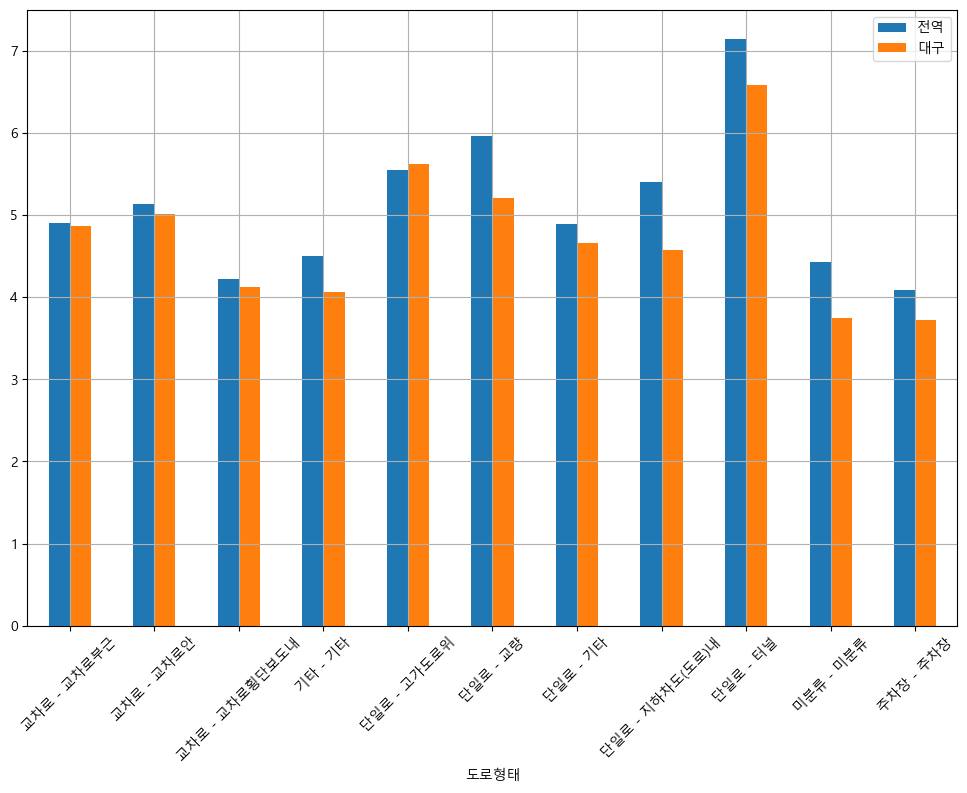

In [73]:
data_fin.plot(kind='bar', figsize=(12, 8), grid=True, rot=45)



### 전지역과 대구의 노면 상태 별 ECLO

In [57]:
other = df.groupby('노면상태')['ECLO'].mean()
other

노면상태
건조       4.932867
기타       4.701468
서리/결빙    5.677656
적설       5.423500
젖음/습기    5.086693
침수       4.731343
해빙       5.296296
Name: ECLO, dtype: float64

In [61]:
daegu = train_df.groupby('노면상태')['ECLO'].mean()
daegu

노면상태
건조       4.712878
기타       4.086207
서리/결빙    4.160000
적설       3.000000
젖음/습기    4.906452
침수       5.666667
Name: ECLO, dtype: float64

In [62]:
oth_df = other.to_frame()
dae_df = daegu.to_frame()


In [63]:
data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)
data_fin

,ECLO_x,ECLO_y
노면상태,,
건조,4.932867,4.712878
기타,4.701468,4.086207
서리/결빙,5.677656,4.160000
적설,5.423500,3.000000
젖음/습기,5.086693,4.906452
침수,4.731343,5.666667


In [64]:
data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})
data_fin

,전역,대구
노면상태,,
건조,4.932867,4.712878
기타,4.701468,4.086207
서리/결빙,5.677656,4.160000
적설,5.423500,3.000000
젖음/습기,5.086693,4.906452
침수,4.731343,5.666667


<Axes: xlabel='노면상태'>

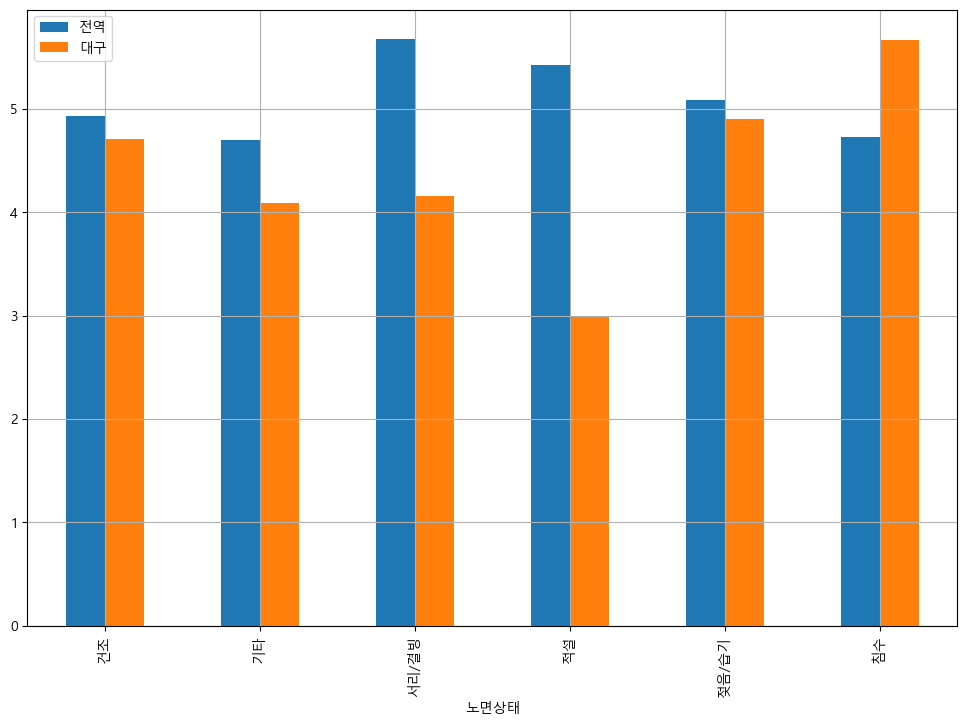

In [66]:
data_fin.plot(kind='bar', figsize=(12, 8), grid=True)

### 전지역과 대구 별 사고유형에 따른 ECLO

In [75]:
other = df.groupby('사고유형')['ECLO'].mean()
other

사고유형
차대사람     4.046983
차대차      5.176242
차량단독     4.693290
철길건널목    8.083333
Name: ECLO, dtype: float64

In [79]:
daegu = train_df.groupby('사고유형')['ECLO'].mean()
daegu['철길건널목'] = 0.0
daegu

사고유형
차대사람     3.817650
차대차      4.944597
차량단독     4.006054
철길건널목    0.000000
Name: ECLO, dtype: float64

In [81]:
oth_df = other.to_frame()
dae_df = daegu.to_frame()

In [82]:
data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)
data_fin

,ECLO_x,ECLO_y
사고유형,,
차대사람,4.046983,3.817650
차대차,5.176242,4.944597
차량단독,4.693290,4.006054
철길건널목,8.083333,0.000000


In [83]:
data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})

<Axes: xlabel='사고유형'>

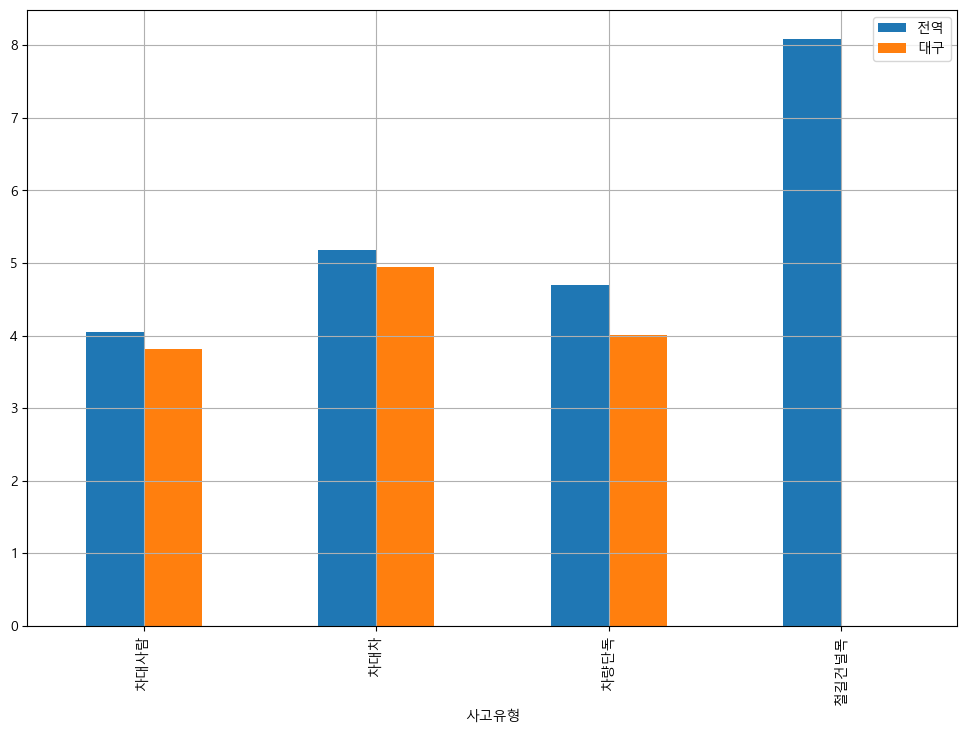

In [84]:
data_fin.plot(grid=True, kind='bar', figsize=(12, 8))

### 전지역과 대구 별 연도에 따른 ECLO

<Axes: xlabel='연'>

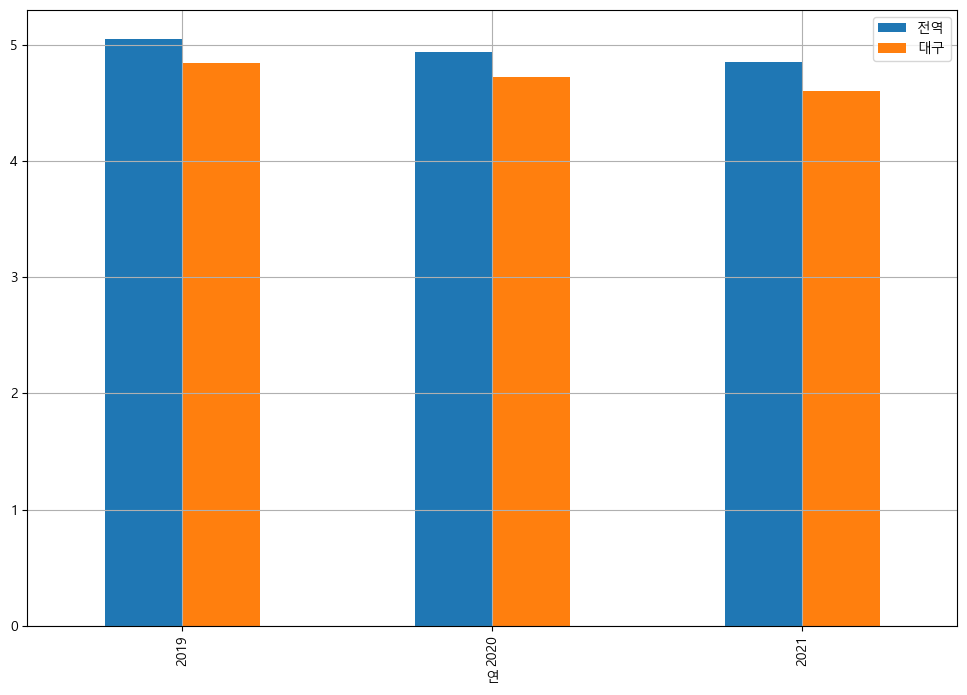

In [85]:
other = df.groupby('연')['ECLO'].mean()
daegu = train_df.groupby('연')['ECLO'].mean()

oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)

data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})

data_fin.plot(grid=True, kind='bar', figsize=(12, 8))

### 전지역과 대구 별 월별 ECLO

<Axes: xlabel='월'>

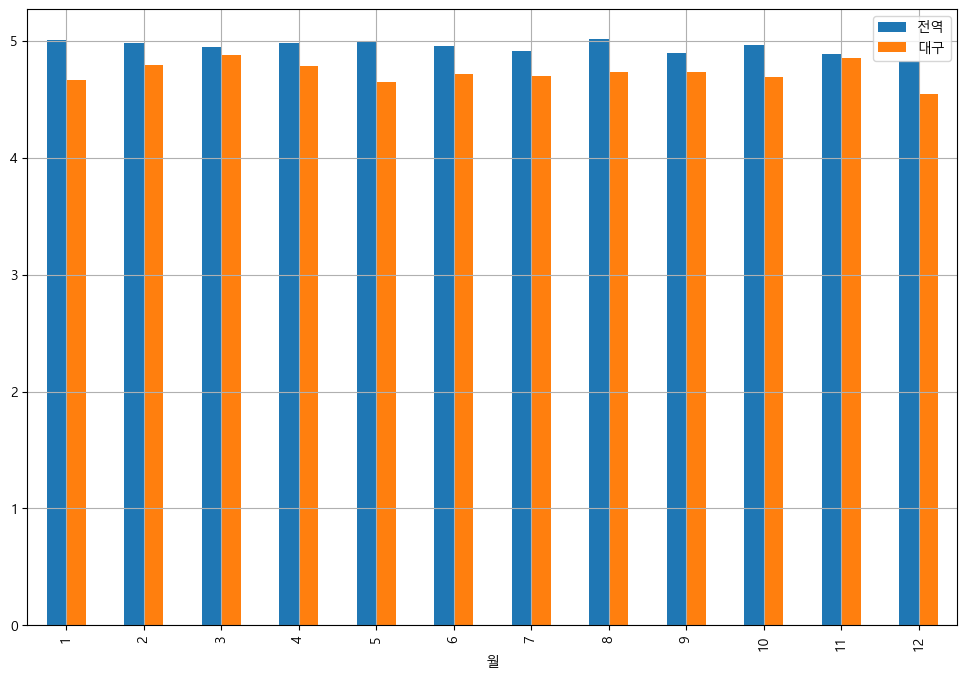

In [86]:
other = df.groupby('월')['ECLO'].mean()
daegu = train_df.groupby('월')['ECLO'].mean()

oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)

data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})

data_fin.plot(grid=True, kind='bar', figsize=(12, 8))

### 전지역과 대구의 요일 별 ECLO

<Axes: xlabel='요일'>

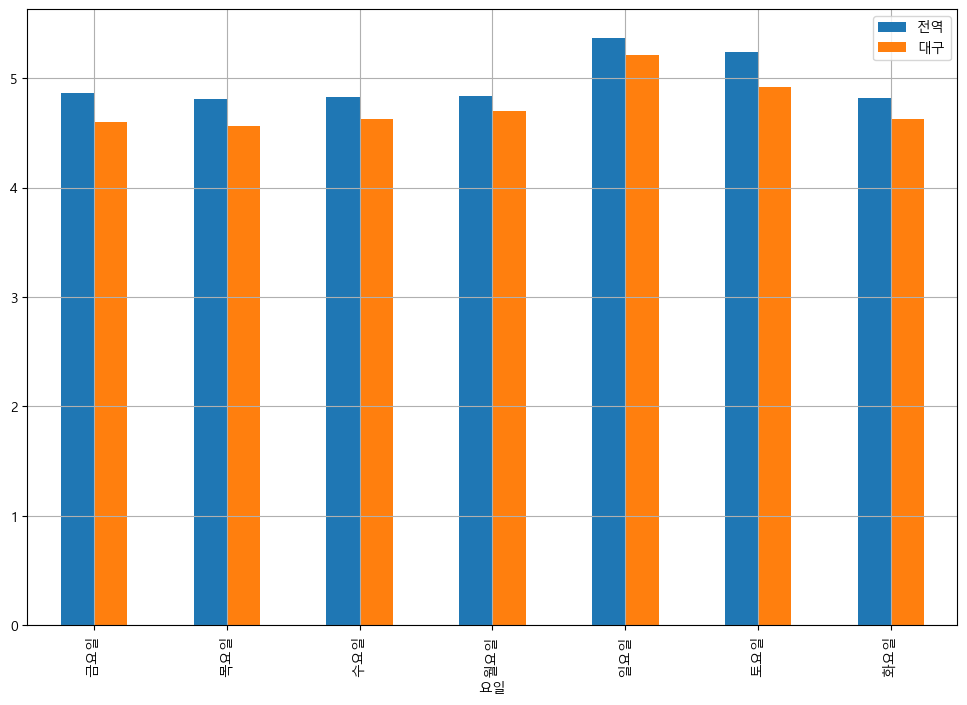

In [87]:
other = df.groupby('요일')['ECLO'].mean()
daegu = train_df.groupby('요일')['ECLO'].mean()

oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)

data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})

data_fin.plot(grid=True, kind='bar', figsize=(12, 8))

### 전지역과 대구 별 기상상태에 따른 ECLO

<Axes: xlabel='기상상태'>

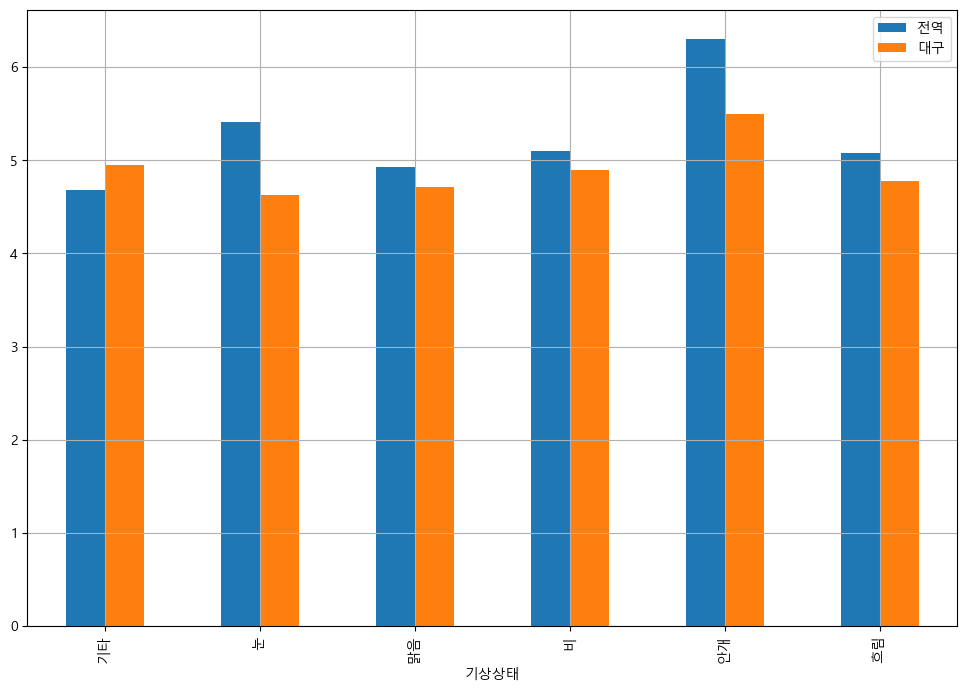

In [88]:
other = df.groupby('기상상태')['ECLO'].mean()
daegu = train_df.groupby('기상상태')['ECLO'].mean()

oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)

data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})

data_fin.plot(grid=True, kind='bar', figsize=(12, 8))

### 도시별 ECLO

<Axes: ylabel='도시'>

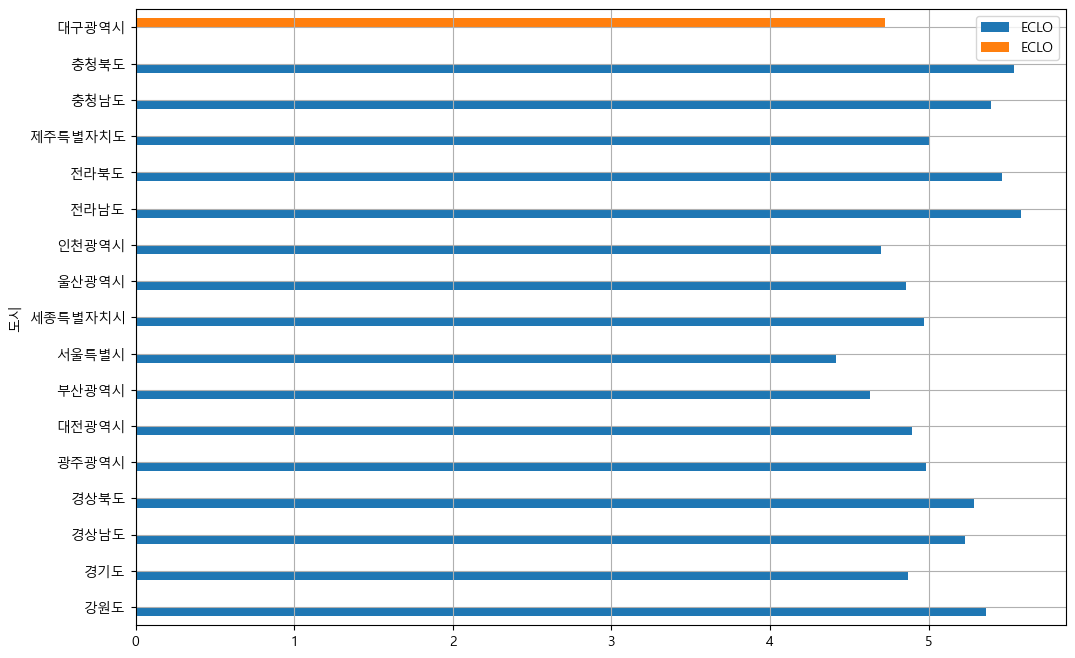

In [161]:
other = df.groupby('도시')['ECLO'].mean()
daegu = train_df.groupby('도시')['ECLO'].mean()


oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.concat([oth_df, dae_df], axis=1)
data_fin = data_fin.drop('미분류')

data_fin.plot(grid=True, kind='barh', figsize=(12, 8))

### 도시별 ECLO 합계

<Axes: ylabel='도시'>

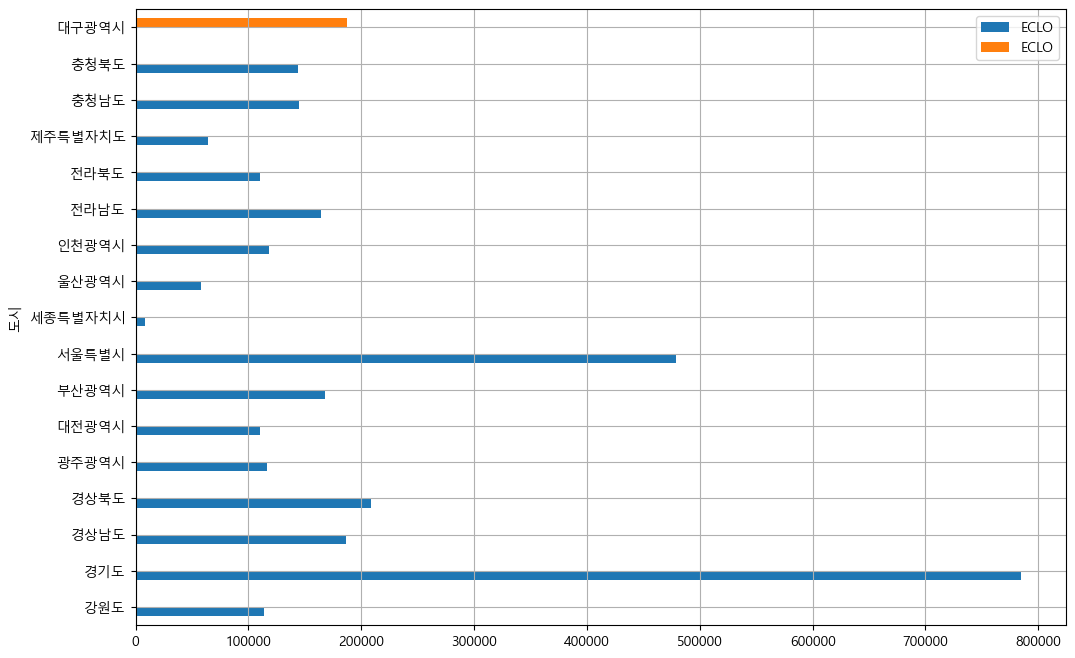

In [168]:
other = df.groupby('도시')['ECLO'].sum()
daegu = train_df.groupby('도시')['ECLO'].sum()


oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.concat([oth_df, dae_df], axis=1)
data_fin = data_fin.drop('미분류')

data_fin.plot(grid=True, kind='barh', figsize=(12, 8))

### 사교유형 - 세부분류 별 ECLO

<Axes: xlabel='사고유형 - 세부분류'>

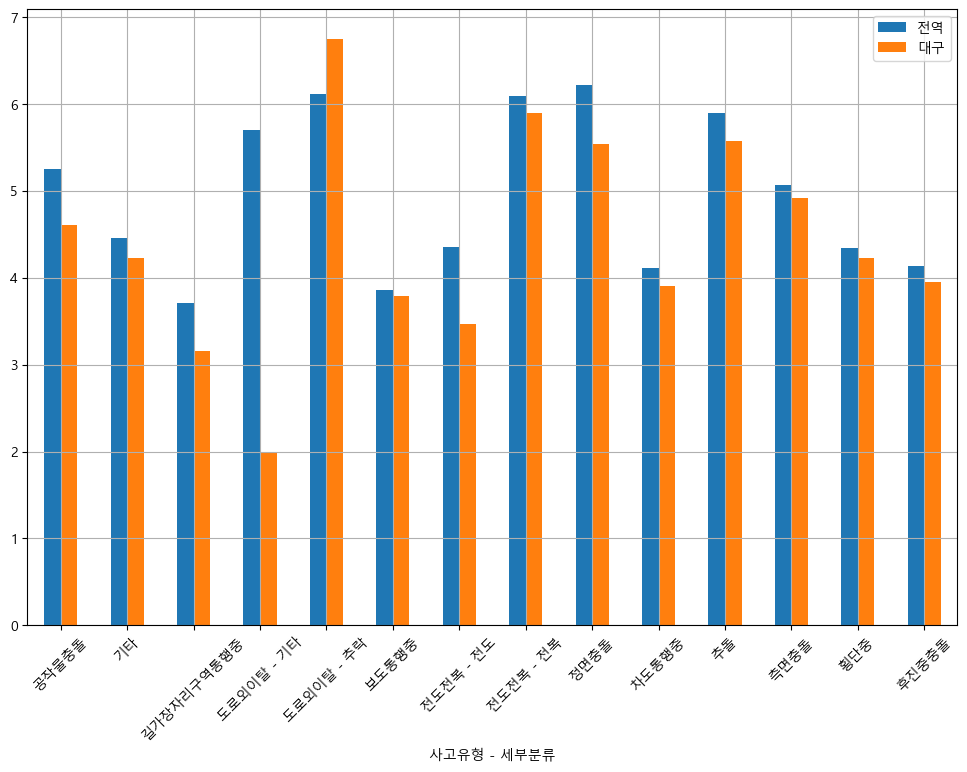

In [163]:
other = df.groupby('사고유형 - 세부분류')['ECLO'].mean()
daegu = train_df.groupby('사고유형 - 세부분류')['ECLO'].mean()

oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)

data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})

data_fin.plot(grid=True, kind='bar', figsize=(12, 8), rot=45)

### 법규위반 별 ECLO

<Axes: xlabel='법규위반'>

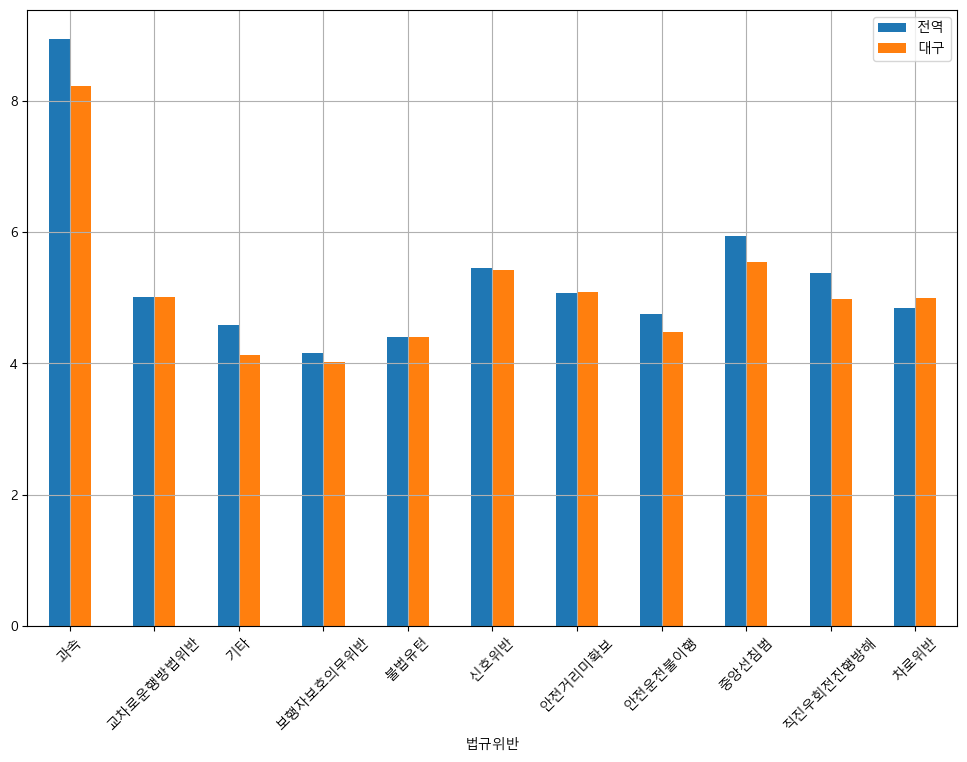

In [169]:
other = df.groupby('법규위반')['ECLO'].mean()
daegu = train_df.groupby('법규위반')['ECLO'].mean()

oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)

data_fin = data_fin.rename(columns={'ECLO_x':'전역'})
data_fin = data_fin.rename(columns={'ECLO_y':'대구'})

data_fin.plot(grid=True, kind='bar', figsize=(12, 8), rot=45)

### 도시별 사망자수

<Axes: ylabel='도시'>

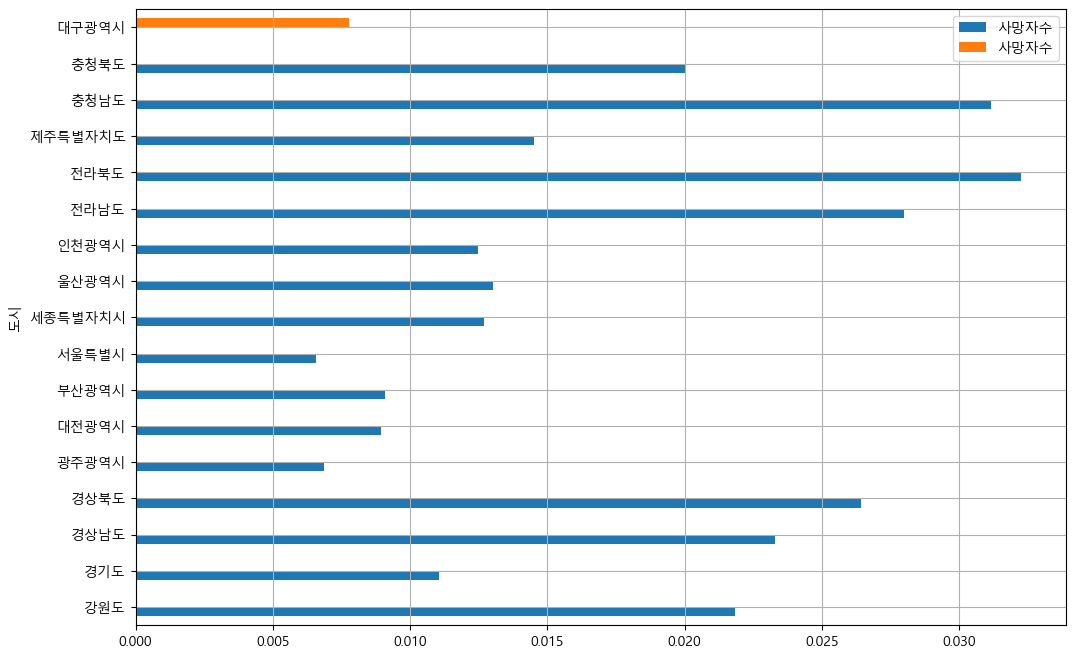

In [178]:
other = df.groupby('도시')['사망자수'].mean()
daegu = train_df.groupby('도시')['사망자수'].mean()


oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.concat([oth_df, dae_df], axis=1)
data_fin = data_fin.drop('미분류')

data_fin.plot(grid=True, kind='barh', figsize=(12, 8))

<Axes: xlabel='시간'>

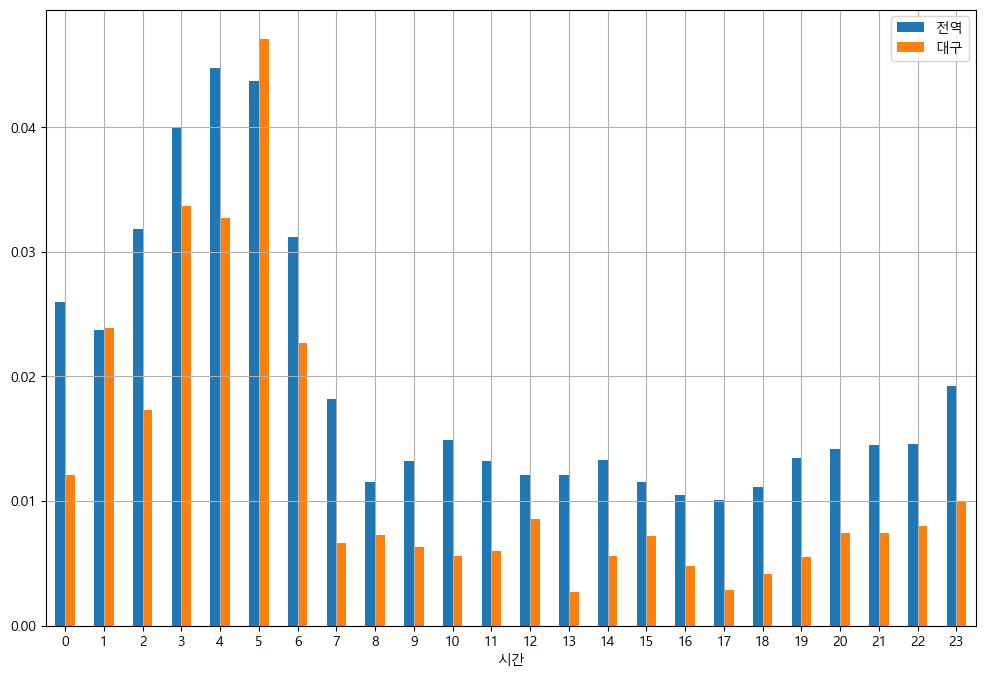

In [184]:
other = df.groupby('시간')['사망자수'].mean()
daegu = train_df.groupby('시간')['사망자수'].mean()

oth_df = other.to_frame()
dae_df = daegu.to_frame()

data_fin = pd.merge(oth_df, dae_df, left_index=True, right_index=True)

data_fin = data_fin.rename(columns={'사망자수_x':'전역'})
data_fin = data_fin.rename(columns={'사망자수_y':'대구'})

data_fin.plot(grid=True, kind='bar', figsize=(12, 8), rot=0)

### 오전 5시대의 사고 유형